In [1]:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy import signal
import pathlib
import itertools
import glob
import json

In [2]:
import monalysa
from monalysa import movements
from monalysa import quality

In [3]:
# Define the font family and size
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Helvetica']
plt.rcParams['font.weight'] = 'light'  # Use 'light' font weight

In [4]:
base_fig_dir = pathlib.Path.cwd().parent / "figures"

## Generate random movements for comparing DLJ, LDLJ, and SPARC

In [73]:
n_moves = 100
# Generate n_moves movements
movesdata = [movements.generate_random_movement(move_type='Gaussian')[:2]
             for _ in range(n_moves)]
ts = np.diff(movesdata[0][0])[0]
fs = 1 / ts

# Now generate the appended signals for all combinations of the movements
movesdata_apnd = [[np.append(_m1[1], _m2[1]) for _m2 in movesdata]
                  for _m1 in movesdata]

In [74]:
# Smoothness of the origjnal movements
# Apply the three measures: DLJ, LDLJ, and SPARC to the movements
# SPARC
sparc_smooth1  = np.array([quality.smoothness.sparc(_move[1], fs=fs)[0]
                           for _move in movesdata])
# LDLJ
ldlj_smooth1 = np.array([quality.smoothness.log_dimensionless_jerk(_move[1], fs=fs, data_type="vel")
                         for _move in movesdata])
# DLJ
dlj_smooth1 = np.array([quality.smoothness.dimensionless_jerk(_move[1], fs=fs, data_type="vel")
                        for _move in movesdata])

In [75]:
# Apply the three measures: DLJ, LDLJ, and SPARC to the movements
# SPARC
sparc_smooth_apnd  = np.array([[quality.smoothness.sparc(_move, fs=fs)[0]
                                for _move in _moves]
                               for _moves in movesdata_apnd])
# LDLJ
ldlj_smooth_apnd = np.array([[quality.smoothness.log_dimensionless_jerk(_move, fs=fs, data_type="vel")
                              for _move in _moves]
                             for _moves in movesdata_apnd])
# DLJ
dlj_smooth_apnd = np.array([[quality.smoothness.dimensionless_jerk(_move, fs=fs, data_type="vel")
                             for _move in _moves]
                            for _moves in movesdata_apnd])

In [76]:
dsparc

array([[-1.97615896, -2.64045729, -1.759389  , -0.97928893, -2.24253826,
        -1.32720554, -1.3466817 , -0.82167171, -0.28757723, -1.94692023],
       [-0.79662321, -2.17272132, -0.72564443, -0.02303972, -1.67891281,
        -0.86242969, -0.57180695, -0.24690135, -0.11478753, -0.94443988],
       [-0.9702081 , -1.41971389, -2.0618472 , -0.86440697, -2.12712869,
        -1.49645994, -0.61316734, -0.64318493, -0.6010607 , -1.42879543],
       [-0.64051802, -1.71116876, -1.07932808, -1.23545227, -1.42803635,
        -0.64112921, -0.22758414, -0.52442305, -0.18820365, -0.95893664],
       [-0.55376609, -1.16666114, -0.67302679, -0.23682995, -2.30475626,
        -0.92458046, -0.39579781, -0.8001607 ,  0.06716495, -0.49967869],
       [-1.72899014, -2.61089695, -1.6963598 , -1.39398468, -2.38236522,
        -2.46424274, -1.1219222 , -2.04469188, -0.46404005, -1.47523538],
       [-1.21208652, -2.16984239, -1.37562423, -0.22169375, -2.24255455,
        -1.22633675, -1.69496891, -0.46093447

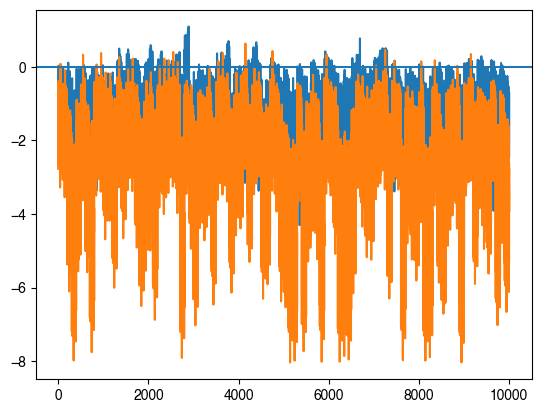

In [77]:
# Compute the change in smoothness.
dsparc = np.array([sparc_smooth_apnd[i] - sparc_smooth1[i] for i in range(n_moves)])
dldlj = np.array([ldlj_smooth_apnd[i] - ldlj_smooth1[i] for i in range(n_moves)])
plt.plot(dsparc.reshape(-1))
plt.plot(dldlj.reshape(-1))
plt.axhline(0)

In [64]:
dsparc

array([[-1.97615896, -2.64045729, -1.759389  , -0.97928893, -2.24253826,
        -1.32720554, -1.3466817 , -0.82167171, -0.28757723, -1.94692023],
       [-0.79662321, -2.17272132, -0.72564443, -0.02303972, -1.67891281,
        -0.86242969, -0.57180695, -0.24690135, -0.11478753, -0.94443988],
       [-0.9702081 , -1.41971389, -2.0618472 , -0.86440697, -2.12712869,
        -1.49645994, -0.61316734, -0.64318493, -0.6010607 , -1.42879543],
       [-0.64051802, -1.71116876, -1.07932808, -1.23545227, -1.42803635,
        -0.64112921, -0.22758414, -0.52442305, -0.18820365, -0.95893664],
       [-0.55376609, -1.16666114, -0.67302679, -0.23682995, -2.30475626,
        -0.92458046, -0.39579781, -0.8001607 ,  0.06716495, -0.49967869],
       [-1.72899014, -2.61089695, -1.6963598 , -1.39398468, -2.38236522,
        -2.46424274, -1.1219222 , -2.04469188, -0.46404005, -1.47523538],
       [-1.21208652, -2.16984239, -1.37562423, -0.22169375, -2.24255455,
        -1.22633675, -1.69496891, -0.46093447

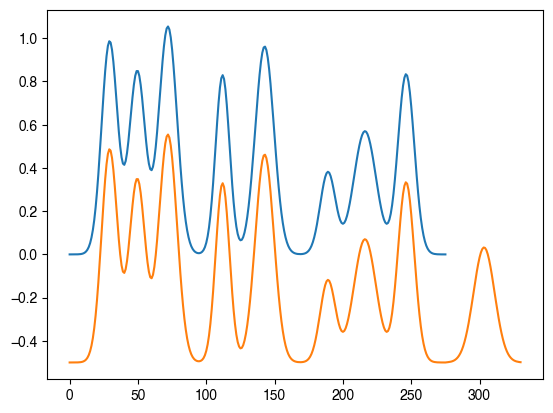

In [72]:
plt.plot(movesdata[-1][1])
plt.plot(movesdata_apnd[-1][8] - 0.5)

In [ ]:
# Apply the three measures: DLJ, LDLJ, and SPARC to the movements
# SPARC
sparc_smooth1  = np.array([quality.smoothness.sparc(_move[1], fs=fs)[0]
                           for _move in movesdata])
# LDLJ
ldlj_smooth1 = np.array([quality.smoothness.log_dimensionless_jerk(_move[1], fs=fs, data_type="vel")
                         for _move in movesdata])
# DLJ
dlj_smooth1 = np.array([quality.smoothness.dimensionless_jerk(_move[1], fs=fs, data_type="vel")
                        for _move in movesdata])

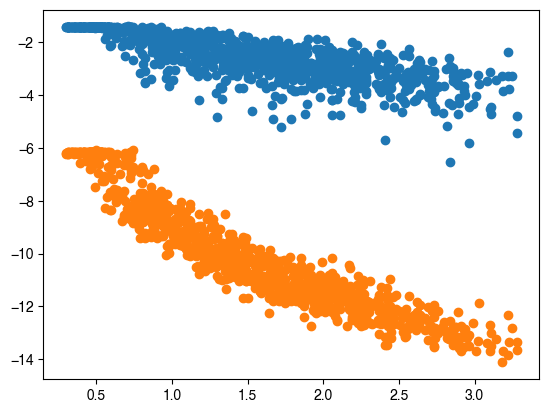

In [16]:
plt.plot(movedurs, sparc_smooth1, 'o', label='SPARC')
plt.plot(movedurs, ldlj_smooth1, 'o', label='SPARC')

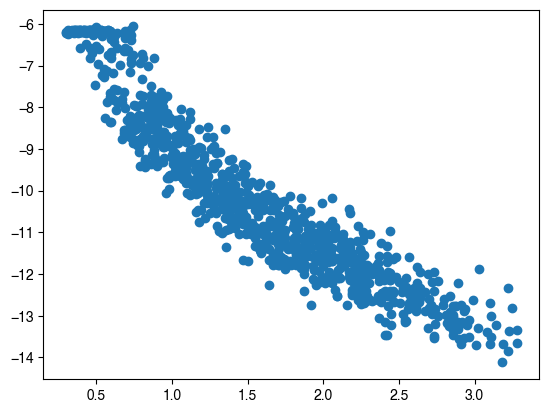

In [24]:
_temp = np.vstack([np.array(movedurs), ldlj_smooth1])
# Sort the array by the first row
_temp = _temp[:, _temp[0].argsort()]
plt.plot(_temp[0], _temp[1], 'o', label='LDLJ')

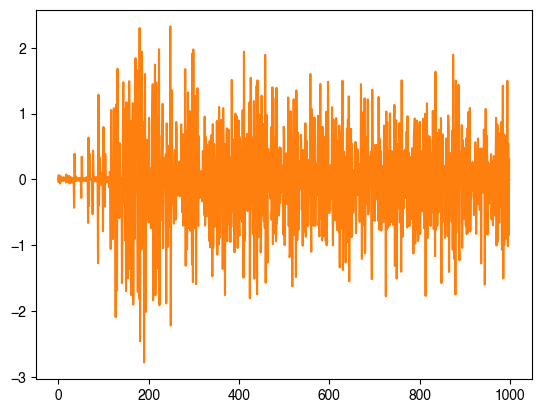

In [26]:
plt.plot(np.diff(_temp[0]))
plt.plot(np.diff(_temp[1]))

/var/folders/b1/lv90qvk91r10v6yns5ws2lvc0000gn/T/ipykernel_79925/2292775709.py:42: RuntimeWarning: divide by zero encountered in log
  _y = - np.log(np.abs(_x))


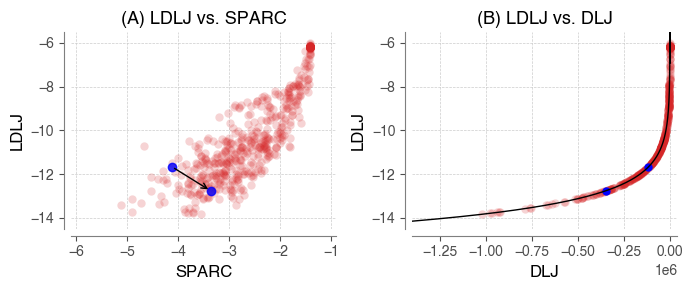

In [24]:
fig = plt.figure(figsize=(7, 3))
N = 500
_inx = [120, 250]
ax = fig.add_subplot(121)
ax.plot(sparc_smooth1[:N], ldlj_smooth1[:N], 'o', color='tab:red', alpha=0.2,
        markeredgewidth=0.0)
ax.plot(sparc_smooth1[_inx[0]], ldlj_smooth1[_inx[0]], 'o', color='blue', alpha=0.8)
ax.plot(sparc_smooth1[_inx[1]], ldlj_smooth1[_inx[1]], 'o', color='blue', alpha=0.8)
# Define the points between which you want to draw the arrow
point1 = {'x': sparc_smooth1[_inx[0]], 'y': ldlj_smooth1[_inx[0]]}
point2 = {'x': sparc_smooth1[_inx[1]], 'y': ldlj_smooth1[_inx[1]]}

# Add an arrow between the two points
plt.annotate('', xy=(point2['x'], point2['y']),
             xytext=(point1['x'], point1['y']),
             arrowprops=dict(arrowstyle='->', color='black'))

ax.set_xlim(-6.1, -0.9)
ax.set_ylim(-14.5, -5.5)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_position(('outward', 5))
ax.spines['bottom'].set_position(('outward', 5))
ax.spines['left'].set_color("tab:gray")
ax.spines['bottom'].set_color("tab:gray")
ax.tick_params(axis='x', colors='0.3')
ax.tick_params(axis='y', colors='0.3')
ax.grid(color='0.8', linestyle='--', linewidth=0.5);

ax.set_ylabel("LDLJ", fontsize=12)
ax.set_xlabel("SPARC", fontsize=12)
ax.set_title("(A) LDLJ vs. SPARC", fontsize=13);

ax = fig.add_subplot(122)
ax.plot(dlj_smooth1[:N], ldlj_smooth1[:N], 'o', color='tab:red', alpha=0.2,
        markeredgewidth=0.0)
ax.plot(dlj_smooth1[_inx[0]], ldlj_smooth1[_inx[0]], 'o',
        color='blue', alpha=1.0, markeredgewidth=0.0)
ax.plot(dlj_smooth1[_inx[1]], ldlj_smooth1[_inx[1]], 'o',
        color='blue', alpha=1.0, markeredgewidth=0.0)
_x = np.arange(-1.5e6, 0.001e6, 0.01e2)
_y = - np.log(np.abs(_x))
ax.plot(_x, _y, lw=1, color='k')
ax.set_xlim(-1.4e6, 0.04e6)
ax.set_ylim(-14.5, -5.5)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_position(('outward', 5))
ax.spines['bottom'].set_position(('outward', 5))
ax.spines['left'].set_color("tab:gray")
ax.spines['bottom'].set_color("tab:gray")
ax.tick_params(axis='x', colors='0.3')
ax.tick_params(axis='y', colors='0.3')
ax.grid(color='0.8', linestyle='--', linewidth=0.5);

ax.set_ylabel("LDLJ", fontsize=12)
ax.set_xlabel("DLJ", fontsize=12)
ax.set_title("(B) LDLJ vs. DLJ", fontsize=13);

plt.tight_layout()

# # Save figure
# fig.savefig(pathlib.Path(base_fig_dir, f"smm_equiv.pdf"), bbox_inches="tight")
# fig.savefig(pathlib.Path(base_fig_dir, f"smm_equiv.svg"), bbox_inches="tight")